In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
data=pd.read_excel('indic.xlsx',engine='openpyxl')

In [5]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data = data.select_dtypes(exclude=['object'])

In [7]:
data=data.drop('REG',axis=1)
data=data.drop(columns='Table Centrale.COM',axis=1)
data=data.drop(columns="Indicateurs de loyers d'annonce par commune 2022.COM",axis=1)
data=data.drop('EPCI',axis=1)
data=data.drop('DEP',axis=1)
data=data.drop('id_zone',axis=1)

data

,loypredm2,lwrIPm2,uprIPm2,nbobs_com,nbobs_mail,R2_adj,NTLBIN
0,5.837054,4.653686,7.321337,0,1735,0.789789,0
1,7.383331,5.931119,9.191110,2,636,0.801407,0
2,8.227492,6.727934,10.061280,13,538,0.748814,0
3,8.708889,7.309312,10.376454,56,493,0.758813,0
4,7.655703,5.932401,9.879606,7,507,0.597410,0
...,...,...,...,...,...,...,...
4304,9.938776,8.145496,12.126858,8,1210,0.840051,0
4305,8.402610,6.730342,10.490381,1,30998,0.826520,0
4306,7.655703,5.932401,9.879606,0,507,0.597410,0
4307,9.938776,8.145496,12.126858,12,1210,0.840051,0


In [8]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
loypredm2     0.153549
lwrIPm2       0.145201
uprIPm2       0.158791
nbobs_com     0.278341
nbobs_mail    0.093603
R2_adj        0.043479
NTLBIN        1.000000
Name: NTLBIN, dtype: float64


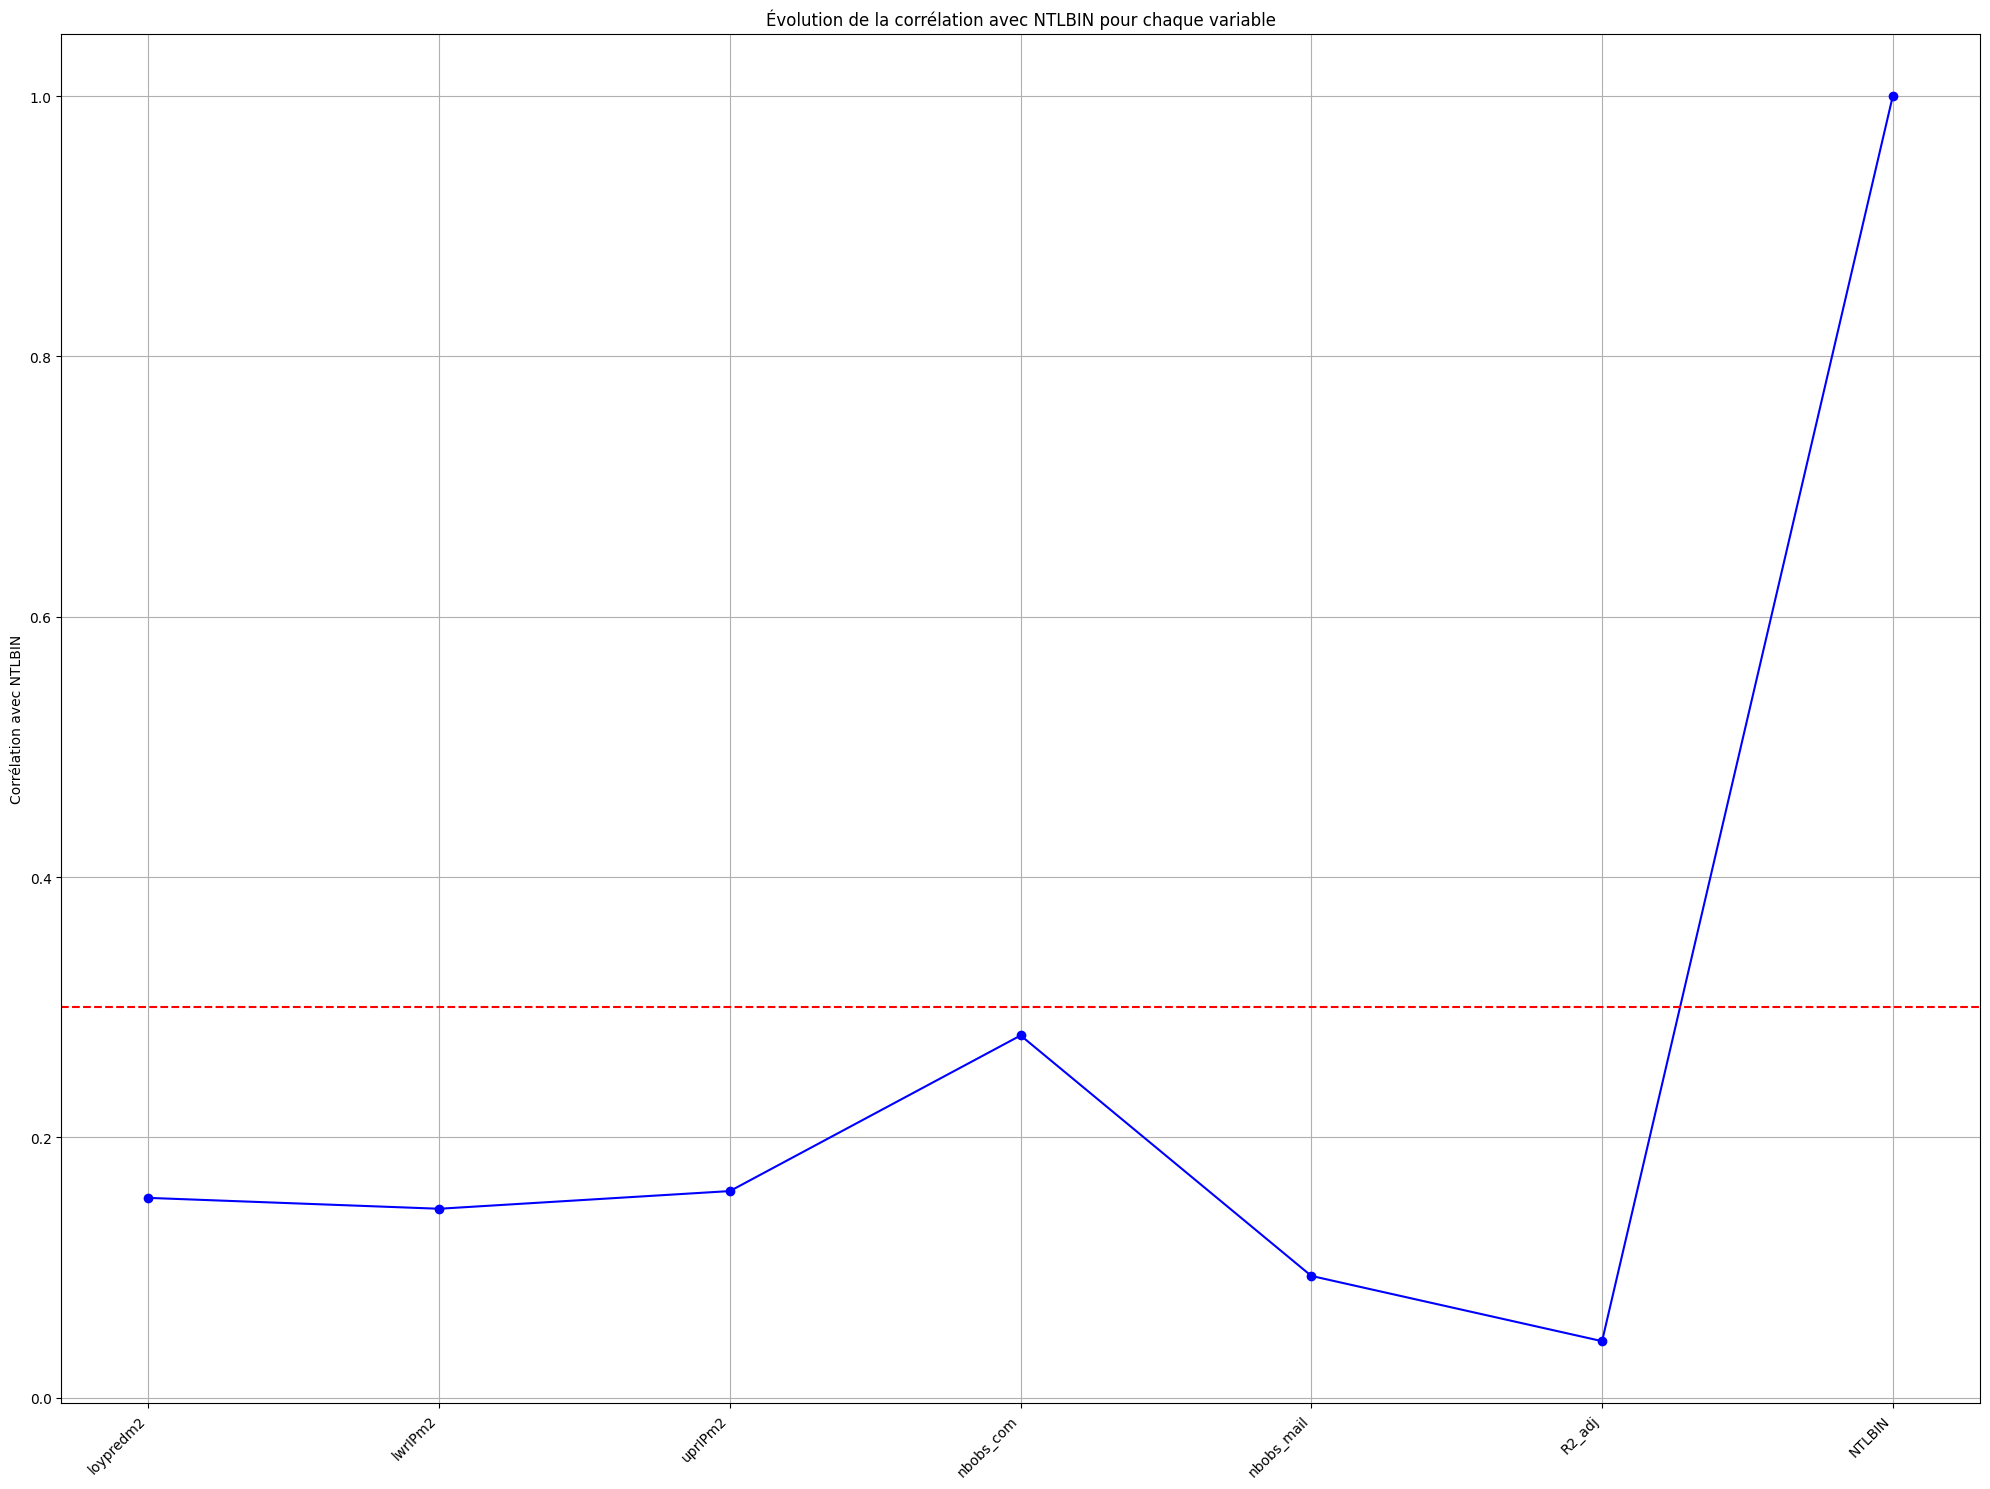

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


VIF initiaux:
     Variable           VIF
0   loypredm2  2.538399e+06
1     lwrIPm2  6.358537e+05
2     uprIPm2  6.345437e+05
3   nbobs_com  1.172716e+00
4  nbobs_mail  1.436810e+00
5      R2_adj  4.080255e+01
Suppression de la variable avec le VIF le plus élevé: loypredm2
     Variable         VIF
0     lwrIPm2  325.613027
1     uprIPm2  320.990448
2   nbobs_com    1.165034
3  nbobs_mail    1.432014
4      R2_adj   40.722487
Suppression de la variable avec le VIF le plus élevé: lwrIPm2
     Variable        VIF
0     uprIPm2  38.972937
1   nbobs_com   1.164594
2  nbobs_mail   1.413679
3      R2_adj  39.040518
Suppression de la variable avec le VIF le plus élevé: R2_adj
     Variable       VIF
0     uprIPm2  1.248743
1   nbobs_com  1.143103
2  nbobs_mail  1.405165
Variables restantes après suppression des variables à forte multicolinéarité:
Index(['uprIPm2', 'nbobs_com', 'nbobs_mail'], dtype='object')


In [11]:
Z=X.columns
print(Z)

Index(['uprIPm2', 'nbobs_com', 'nbobs_mail'], dtype='object')


In [12]:
colonnes=[]
for txt in X.columns:
    colonnes.append(txt)


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.164385
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4309
Model:                          Logit   Df Residuals:                     4306
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.1080
Time:                        15:17:36   Log-Likelihood:                -708.33
converged:                       True   LL-Null:                       -794.13
Covariance Type:            nonrobust   LLR p-value:                 5.457e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
uprIPm2       -0.3148      0.009    -36.044      0.000      -0.332      -0.298
nbobs_com      0.0030      0.

In [15]:
3

Optimization terminated successfully.
         Current function value: 0.164414
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4309
Model:                          Logit   Df Residuals:                     4307
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.1079
Time:                        15:18:50   Log-Likelihood:                -708.46
converged:                       True   LL-Null:                       -794.13
Covariance Type:            nonrobust   LLR p-value:                 3.746e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
uprIPm2       -0.3130      0.008    -39.396      0.000      -0.329      -0.297
nbobs_com      0.0030      0.

C:\Users\mohci\AppData\Local\Temp\ipykernel_13804\1264916443.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if result.pvalues[i] >=0.05 :


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[822   4]
 [ 28   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       826
           1       0.67      0.22      0.33        36

    accuracy                           0.96       862
   macro avg       0.82      0.61      0.66       862
weighted avg       0.95      0.96      0.95       862


Accuracy Score:
0.962877030162413


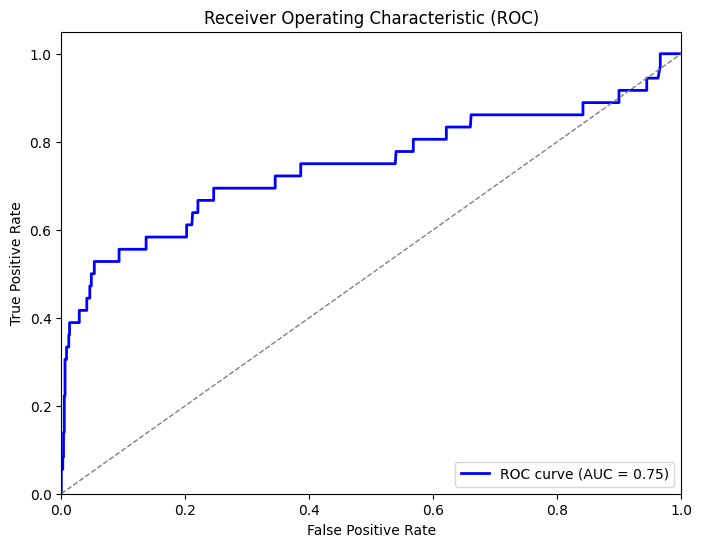

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()